Oluwatimilehin Jubril Jasanya
x20258330

In [ ]:
# for data loading/wrangling
import numpy as np
import pandas as pd
# for stats tests
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.stats.multicomp as mc

# for visualisations
from matplotlib import pyplot
import seaborn as sns

In [ ]:
Worker_1 = [1.1,2.8,0.6,5.8,3.9,2.2,2.2,0.3]
Worker_2 = [3.1,3.5,6.2,1.6,2.4,3.2,2.3,4.4]
Worker_3 = [3.2,4.4,1.7,3.3,3.4,4.5,1.3,1.2,3.4,1.3]

In [ ]:
#Question 2A
#The null hypothesis is: 
#H0: μ1=μ2=μ3 -There is no significant difference in the time taken by wokers.

#The alternative hypothesis is: 
#Ha:μ1≠μ2≠μ3 - There is a significant difference in the time taken by wokers

Question 2B
Since our test is based on two independent groups of test subjects, we will carry out a test of normality using Q-Q plot first to deterimine if the data is normal.

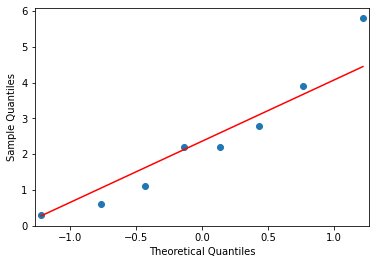

In [ ]:
fig = sm.qqplot(np.array(Worker_1), line='s')
pyplot.show()

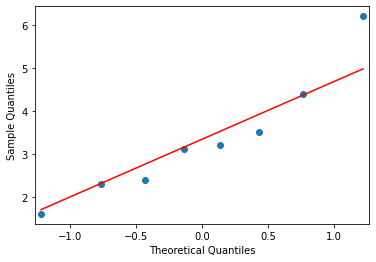

In [ ]:
fig = sm.qqplot(np.array(Worker_2), line='s')
pyplot.show()

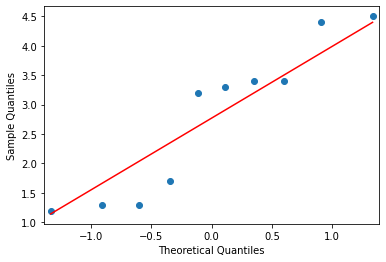

In [ ]:
fig = sm.qqplot(np.array(Worker_3), line='s')
pyplot.show()

The diagrams suggest a line of normality. But to futher elaborate, we will use the Shapiro-Wilk test. With the null and alternate hypothesis as:
  H0: The data are normally distributed.

  H1: The data are not normally distributed.
With alpha = 0.05

In [ ]:
normality_report = 'For {}, the test statistic is {:.3f} and the p value is {:.3f}'
statistic, pvalue = st.shapiro(Worker_1) 
print(normality_report.format('Worker_1',statistic,pvalue))

For Worker_1, the test statistic is 0.933 and the p value is 0.540


In [ ]:
normality_report = 'For {}, the test statistic is {:.3f} and the p value is {:.3f}'
statistic, pvalue = st.shapiro(Worker_2) 
print(normality_report.format('Worker_2',statistic,pvalue))

For Worker_2, the test statistic is 0.923 and the p value is 0.456


In [ ]:
normality_report = 'For {}, the test statistic is {:.3f} and the p value is {:.3f}'
statistic, pvalue = st.shapiro(Worker_3) 
print(normality_report.format('Worker_3',statistic,pvalue))

For Worker_3, the test statistic is 0.862 and the p value is 0.080


Since our values are not normally distributed, the best test to perform is the one-way Anova

Question 2C 
For our Alpha Value, We will be using 0.05. This is because with a lower alpha value, the probability of commiting a type 1 error is less.

Question 2D

In [ ]:
!python -m pip install statsmodels 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade --no-deps statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 12.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import statsmodels.stats.oneway as ow

In [ ]:
a = {'Worker_1' : Worker_1 ,'Worker_2' : Worker_2 , 'Worker_3': Worker_3}
df = pd.DataFrame.from_dict(a, orient='index')
df = df.transpose()

In [ ]:
df.describe()

,Worker_1,Worker_2,Worker_3
count,8.000000,8.000000,10.000000
mean,2.362500,3.337500,2.770000
std,1.827518,1.434212,1.284134
min,0.300000,1.600000,1.200000
25%,0.975000,2.375000,1.400000
50%,2.200000,3.150000,3.250000
75%,3.075000,3.725000,3.400000
max,5.800000,6.200000,4.500000


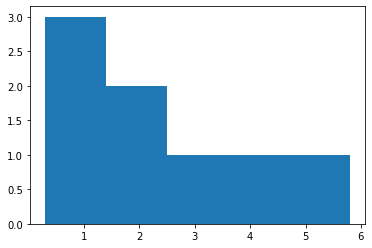

In [ ]:
#Question E
fig = pyplot.hist(Worker_1, bins=5)
pyplot.show()

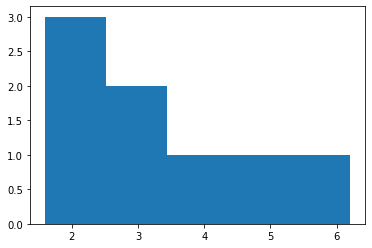

In [ ]:
fig = pyplot.hist(Worker_2, bins=5)
pyplot.show()

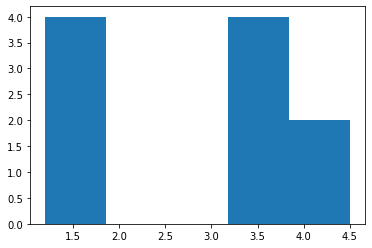

In [ ]:
fig = pyplot.hist(Worker_3, bins=5)
pyplot.show()

Using Levenes's test to test for euqlaity of varaiance, we have our 
    H0 : The population varaiance is equal (homoscedasticity).

    H1: The population varaince is not equal (heteroscedasticity). 
we will use a significance level α = 0.05


In [ ]:
#Question F
homoscedasticity_report = 'The test statistic is {:.3f} and the p value is {:.3f}'

statistic, pvalue = st.levene(
    Worker_3,
    Worker_2,
    Worker_1
)

print(homoscedasticity_report.format(statistic,pvalue))



The test statistic is 0.253 and the p value is 0.779


Given that the result of the test is significant, we can say that there is equality of variance is present in the data. As such we can proceed on the basis that the assumption of equality of variance is met.

In [ ]:
statistic, pvalue = ow.anova_oneway(
    data = [Worker_3,Worker_2,Worker_1], 
    use_var = 'equal', 
    welch_correction = False
)
fcrit = st.f.ppf(1-0.05, 2, len(Worker_3+Worker_2+Worker_1)-3)
anova_report = 'The test statistic is {:.3f} and the p value is {:.3f}. The critical value is {:.3f}'
print(anova_report.format(statistic,pvalue,fcrit))

The test statistic is 0.840 and the p value is 0.445. The critical value is 3.422


In [ ]:
#Post Hoc test
data = Worker_3+Worker_2+Worker_1
groups = ['Worker_3']*len(Worker_3) + ['Worker_2']*len(Worker_2) + ['Worker_1']*len(Worker_1)
print(mc.pairwise_tukeyhsd(data, groups, alpha=0.05))

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
Worker_1 Worker_2    0.975 0.4168 -0.9185 2.8685  False
Worker_1 Worker_3   0.4075 0.8274 -1.3888 2.2038  False
Worker_2 Worker_3  -0.5675 0.7002 -2.3638 1.2288  False
-------------------------------------------------------


Question G
The study was interested in finding the difference if any in time of workers to perform a task. 
A one-way ANOVA was performed. The results were as follows:

F(2,33)=0.84p<0.05

A pairwise comparison was the performed using the Tukey HSD test. This returned a significant result for all pairs.

Conclusions

As the returned p value of the ANOVA is less than our chosen significance (α=0.05), and each pairwise comparison has a significant p value, we can conclude that a significant difference exists between each pair of groups.



Question H
As we have rejected the null hypothesis, it is possible that we have rejected the null when in fact it is true. This would be a Type I error. 